In [96]:
import pandas as pd

In [105]:
df = pd.read_csv("../Scraping/propertiesInfo_philip.csv")

In [69]:
df['price'].head()

0       $370 per week
1       $500 per week
2      $2500 Per Week
3    $450.00 per week
4                $530
Name: price, dtype: object

In [79]:
print(f'the initial length of the dataframe is {len(df)}')

the initial length of the dataframe is 4811


In [106]:
import re
lst = []
for i in range(len(df)):
    price = df['price'].iloc[i].split(" ")
    lst.append(price)
print(lst[0:5]) 
# the reason for this is that some price looks like "Student Only - $330 per week - furnished"
# as price dosen't always appear at the first place, it's better to loop all the words in every price

[['$370', 'per', 'week'], ['$500', 'per', 'week'], ['$2500', 'Per', 'Week'], ['$450.00', 'per', 'week'], ['$530']]


In [107]:
valid_price_lst = []
for pricelst in lst:
    valid_price = [price for price in pricelst if (price[0] == "$")] # some data demonstrated two rent price e.g "$680PW, $2955.00PCM"
    valid_price_lst.append(valid_price)                           # thus we will keep both $values and drop the montly one 
one_price_lst = []
for price_lst in valid_price_lst:
    if price_lst:
        one_price_lst.append(price_lst[0]) # we assume that the weekly rent value will always present first
    else:
        one_price_lst.append("")
one_price_lst
print(one_price_lst[0:5])
print(f'the price list containing the weekly rent is of length {len(one_price_lst)}')

['$370', '$500', '$2500', '$450.00', '$530']
the price list containing the weekly rent is of length 4811


In [108]:
price_num_lst = []
for price in one_price_lst:
    if "." in price:
        price = price[:price.index(".")] # convert $450.00 and $450.99 to $450
    if "/" in price:
        price = price[:price.index("/")] # some price has no space "$690pw/$2998pcm", we slice out the later part
    price=''.join(char for char in price if char.isdigit()) # keep numbers only drop other illustration words
    if price:
        price = int(price)
        price_num_lst.append(price)
    else:
        price = np.nan # some rental price consists word only "contact manager", thus we make them as nan and drop later
        price_num_lst.append(price)
print(price_num_lst[0:5])
print(f'the price list containing the weekly rent is of length {len(price_num_lst)}')

[370, 500, 2500, 450, 530]
the price list containing the weekly rent is of length 4811


In [109]:
df['weekly_rent'] = price_num_lst
df2 = df.dropna()
print(f'{len(df) - len(df2)} data was dropped as no rental price was demonstrated')

103 data was dropped as no rental price was demonstrated


In [110]:
df2.to_csv('price.csv')

In [111]:
df3 = df2[df2['weekly_rent'] > 9999] # probably just dump the year rent ones.
df3

,property_id,listing_type,price,time_listed,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent
331,15503116,Rent,"$33,000 Per Year",2021-11-04T14:22:27,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"SHOP 101R/228 A'BECKETT STREET, Melbourne",MELBOURNE,3000,-37.81031,144.95665,33000.0
1258,14870244,Rent,"$85,000.00",2021-01-30T11:47:10,ApartmentUnitFlat,Maribyrnong City Council - Greater Area,0.0,0.0,12.0,3.0,6,"110 Beevers Street, Footscray",FOOTSCRAY,3011,-37.79584,144.90600,85000.0


In [112]:
result = df2[df2['weekly_rent'] < 9999]
result.head(10)

,property_id,listing_type,price,time_listed,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent
0,16064379,Rent,$370 per week,2022-08-30T15:20:28,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"1106/555 Flinders Street, Melbourne",MELBOURNE,3000,-37.820972,144.956482,370.0
1,16064243,Rent,$500 per week,2022-08-30T14:50:32,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,1,"2901/200 Spencer Street, Melbourne",MELBOURNE,3000,-37.816227,144.953247,500.0
2,16063884,Rent,$2500 Per Week,2022-08-30T13:28:24,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,3.0,2,"5401/464 Collins Street, Melbourne",MELBOURNE,3000,-37.817562,144.958588,2500.0
3,16063772,Rent,$450.00 per week,2022-08-30T13:01:47,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"405/39 Queen Street, Melbourne",MELBOURNE,3000,-37.817886,144.961731,450.0
4,16063139,Rent,$530,2022-08-30T10:15:45,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,0,"625/118 Franklin Street, Melbourne",MELBOURNE,3000,-37.808205,144.958908,530.0
5,16062720,Rent,$550 per week,2022-08-29T17:38:39,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"1206/118 Russell Street, Melbourne",MELBOURNE,3000,-37.813587,144.968719,550.0
6,16062428,Rent,$680,2022-08-29T16:32:47,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,2.0,0,"1411/120 A Beckett St, Melbourne",MELBOURNE,3000,-37.809307,144.959732,680.0
7,16062291,Rent,$360 Per Week,2022-08-29T16:03:28,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"505/296 Flinders Street, Melbourne",MELBOURNE,3000,-37.818040,144.964325,360.0
8,16061056,Rent,$350 per week,2022-08-29T10:47:03,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"1313/268 Flinders Street, Melbourne",MELBOURNE,3000,-37.817814,144.965576,350.0
9,16059629,Rent,$680,2022-08-26T14:20:41,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"2807/81 Abeckett Street, Melbourne",MELBOURNE,3000,-37.809227,144.961380,680.0


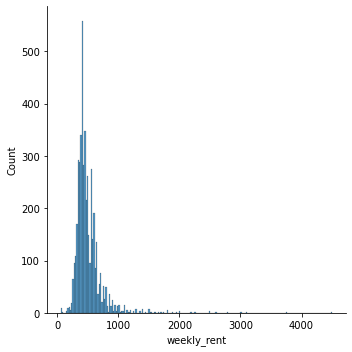

In [118]:
import seaborn as sns
sns.displot(result, x="weekly_rent")

In [116]:
df4 = result[result['weekly_rent'] > 2000] # view the expensive ones see if they'are outliers
df4.head(50)

,property_id,listing_type,price,time_listed,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent
2,16063884,Rent,$2500 Per Week,2022-08-30T13:28:24,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,3.0,2,"5401/464 Collins Street, Melbourne",MELBOURNE,3000,-37.817562,144.958588,2500.0
61,15951316,Rent,$2800 Per Week,2022-06-23T16:34:40,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,3.0,3,"251/350 St Kilda Road, Melbourne",MELBOURNE,3000,-37.831142,144.970856,2800.0
62,15939303,Rent,$4500 Per Week,2022-06-16T20:06:19,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,4,"4203/35 Spring Street, Melbourne",MELBOURNE,3000,-37.814170,144.974000,4500.0
131,16044913,Rent,"$2,250",2022-08-18T09:02:14,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,2,"UNIT 2707/35 SPRING STREET, Melbourne",MELBOURNE,3000,-37.814170,144.974000,2250.0
177,15631154,Rent,"$3,100 per week",2022-01-05T18:50:50,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,1,"7302/462 Elizabeth Street, Melbourne",MELBOURNE,3000,-37.807858,144.960617,3100.0
295,15998618,Rent,"$2,500 PW -TWO LEVELS",2022-07-21T15:03:34,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,2,"241/299 Queen Street, Melbourne",MELBOURNE,3000,-37.811474,144.958618,2500.0
410,15986804,Rent,"$2,600.00",2022-07-14T14:57:52,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,4.0,4.0,3,"231/299 Queen Street, Melbourne",MELBOURNE,3000,-37.811420,144.958786,2600.0
542,11696896,Rent,"$3,000 weekly",2020-07-21T18:14:10,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"3607/80 A'Beckett Street, Melbourne",MELBOURNE,3000,-37.809036,144.961090,3000.0
687,15990663,Rent,"THE DEAL: $2,200 PER WEEK",2022-07-18T11:53:37,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,2,"2105/368 St Kilda Road, Melbourne",MELBOURNE,3004,-37.831810,144.971024,2200.0
986,16048359,Rent,$3750 per week,2022-08-19T14:17:55,Townhouse,Melbourne City Council - Greater Area,0.0,0.0,5.0,6.0,3,"50 South Wharf Drive, Docklands",DOCKLANDS,3008,-37.822395,144.938232,3750.0
